In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
df=pd.read_csv('Downloads/candy-data.csv')

In [7]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [9]:
#LETS SEE IF WE HAVE ANU NULL VALUES

In [11]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [13]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [15]:
df=df.rename(columns={
    'competitorname': "Candy Name",
    'chocolate': 'Chocolate',
    'fruity': 'Fruity Flavor',
    'caramel': 'Caramel',
    'peanutyalmondy': 'Peanuts & Nuts',
    'nougat': 'Nougat',
    'crispedricewafer': 'Crispy',
    'hard': 'Hard Candy',
    'bar': 'Candy bar',
    'pluribus': 'Multi-piece',
    'sugarpercent': 'Sugar Percentage',
    'pricepercent': 'Price Percentage',
    'winpercent': 'Win Percentage'
})
df.head()

,Candy Name,Chocolate,Fruity Flavor,Caramel,Peanuts & Nuts,Nougat,Crispy,Hard Candy,Candy bar,Multi-piece,Sugar Percentage,Price Percentage,Win Percentage
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [17]:
df=df.rename(columns={
    'competitorname': "Candy Name",
    'chocolate': 'Chocolate',
    'fruity': 'Fruity Flavor',
    'caramel': 'Caramel',
    'peanutyalmondy': 'Peanuts & Nuts',
    'nougat': 'Nougat',
    'crispedricewafer': 'Crispy',
    'hard': 'Hard Candy',
    'bar': 'Candy bar',
    'pluribus': 'Multi-piece',
    'sugarpercent': 'Sugar Percentage',
    'pricepercent': 'Price Percentage',
    'winpercent': 'Win Percentage'
})
df.head()

,Candy Name,Chocolate,Fruity Flavor,Caramel,Peanuts & Nuts,Nougat,Crispy,Hard Candy,Candy bar,Multi-piece,Sugar Percentage,Price Percentage,Win Percentage
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


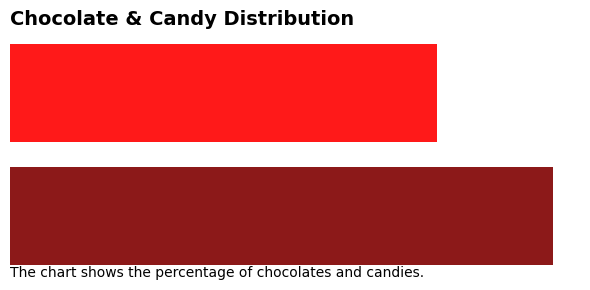

In [19]:
choc_cand_ratio = df['Chocolate'].value_counts(normalize=True).round(2)
fig, ax = plt.subplots(figsize=(6, 3))
# Bar chart
categories = choc_cand_ratio.index
percentages = choc_cand_ratio.values
colors = ['maroon', 'red']
ax.barh(categories, percentages, color=colors, alpha=0.9)

ax.set_title("Chocolate & Candy Distribution", fontsize=14, fontweight='bold', loc='left')
ax.text(0, -0.5, "The chart shows the percentage of chocolates and candies.", fontsize=10)

# Remove unnecessary axes
ax.axis('off')

# Show plot
plt.tight_layout()
plt.show()

In [21]:
#CANDIES ARE MORE THAN CHOCOLATES

In [23]:
df1 = df.drop('Candy Name',axis=1)

In [25]:
df_sorted= df.copy()
df_sorted = df.sort_values(by='Win Percentage', ascending=False)
df_sorted["Rank"] = range(1, len(df_sorted) + 1)
Ranked_df = df_sorted[["Rank","Candy Name","Win Percentage"]]

Ranked_df = Ranked_df[["Rank","Candy Name","Win Percentage"]]
Ranked_df["Percentage"] = Ranked_df["Win Percentage"].round(1).astype(str) + "%"  # Convert to string and append "%"
Ranked_df = Ranked_df[["Rank","Candy Name","Percentage","Win Percentage"]]


#Lets rename the columns
Ranked_df.rename(columns = {"Rank":'RK','Candy Name':'CANDY',"per":'WIN', 'Win Percentage':' WIN PERCENTAGE'}, inplace = True)

# Reset the index and drop the previous index
Ranked_df = Ranked_df.reset_index(drop=True)

# Display the DataFrame without the index column
print(Ranked_df.head())

   RK                      CANDY Percentage   WIN PERCENTAGE
0   1  ReeseÕs Peanut Butter cup      84.2%        84.180290
1   2         ReeseÕs Miniatures      81.9%        81.866257
2   3                       Twix      81.6%        81.642914
3   4                    Kit Kat      76.8%        76.768600
4   5                   Snickers      76.7%        76.673782


In [29]:
X = df[['Sugar Percentage',
       'Price Percentage', 'Win Percentage']]
y= df[['Chocolate']]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=51)
print('shape of X_train =', X_train.shape)
print('shape of y_train =', y_train.shape)

shape of X_train = (68, 3)
shape of y_train = (68, 1)


In [31]:
sc= StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
lg=LogisticRegression()

In [33]:
lg.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
y_pred=lg.score(X_test,y_test)

In [37]:
y_pred

0.8235294117647058